## Libraries

In [26]:
import moviepy.editor as mp
from moviepy.audio.AudioClip import AudioArrayClip
# python -m pip install git+https://github.com/nficano/pytube
from pytube import YouTube 
import matplotlib.pyplot as plt

## Testing

In [10]:
clip = mp.VideoFileClip("../data/Soviet_Tank_Meme.mp4")

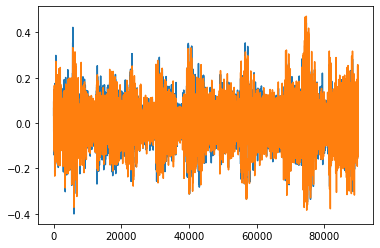

In [17]:
audio = clip.audio.to_soundarray()
plt.plot(audio[100000:190000])

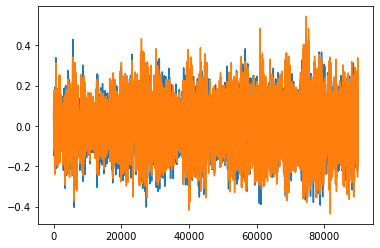

In [22]:
audio_1 = audio[10000:100000]
audio_2 = audio[100000:190000]
combined = audio_1 + audio_2
plt.plot(combined)

In [27]:
audio_stereo = AudioArrayClip(combined, fps=44100)
audio_stereo.write_audiofile('../data/stereo.mp3')

MoviePy - Writing audio in ../data/stereo.mp3
MoviePy - Done.


In [29]:
len_in_sec = clip.audio.duration
len_in_samples = audio.shape[0]

print('{:20s} {:16f}'.format("length in sec:", len_in_sec))
print('{:20s} {:16f}'.format("length in samples:", len_in_samples), "\n")
print('{:20s} {:16f}'.format("samples per second:", len_in_samples/len_in_sec))

length in sec:              11.340000
length in samples:      500094.000000 

samples per second:      44100.000000


In [9]:
clip.audio.preview()

## Fetch videos from youtube

In [2]:
url = "https://www.youtube.com/watch?v=kPnWnX-CV7g"
video = YouTube(url)

In [3]:
# check available streams
video.streams.all()

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="24fps" vcodec="avc1.640028" progressive="False" type="video">,
 <Stream: itag="248" mime_type="video/webm" res="1080p" fps="24fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="399" mime_type="video/mp4" res="1080p" fps="24fps" vcodec="av01.0.08M.08" progressive="False" type="video">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.4d4016" progressive="False" type="video">,
 <Stream: itag="247" mime_type="video/webm" res="720p" fps="24fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="398" mime_type="video/mp4" res="720p" fps="24fps" vcodec="av01.0.05M.08" progressive="False" type="video"

In [8]:
# filter streams
video.streams.filter(res="240p", file_extension="mp4")

[<Stream: itag="133" mime_type="video/mp4" res="240p" fps="24fps" vcodec="avc1.4d400c" progressive="False" type="video">, <Stream: itag="395" mime_type="video/mp4" res="240p" fps="24fps" vcodec="av01.0.00M.08" progressive="False" type="video">]

In [15]:
# download video
stream = video.streams.filter(res="240p", file_extension="mp4")[0]
stream.download(output_path = "../data", filename = "wave_clip")

'/Users/RobinHorn/Documents/UNI/S5/Iannwtf/FinalProject/code/../data/wave_clip.mp4'